In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [2]:
df=pd.read_csv('Ajacency_matrix.csv',index_col=0,header=0)
df.head()

,EMBV3_36880,EMBV3_12193,EMBV3_32069,EMBV3_12200,EMBV3_07752,EMBV3_01993,EMBV3_04815,EMBV3_35222,EMBV3_11544,EMBV3_39314,...,EMBV3_03231,EMBV3_20746,EMBV3_26710,EMBV3_36296,EMBV3_31754,EMBV3_33832,EMBV3_29960,EMBV3_34178,EMBV3_33527,EMBV3_11126
EMBV3_36880,56,0,0,0,0,0,20,0,0,41,...,0,0,0,3,3,1,6,0,0,0
EMBV3_12193,0,35,21,12,22,19,0,16,16,0,...,8,13,15,0,0,0,0,14,11,26
EMBV3_32069,0,21,31,14,14,15,0,18,15,0,...,5,15,14,0,0,0,0,15,7,13
EMBV3_12200,0,12,14,33,18,25,0,10,12,0,...,5,27,18,0,0,0,0,23,6,10
EMBV3_07752,0,22,14,18,39,30,0,12,12,0,...,10,21,14,0,0,0,0,20,7,21


In [3]:
cor_df=pd.read_csv('correlation matrix.csv',header=None)
cor_df

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,0.984325,0.041520,0.053740,0.062071,0.070980,0.051656,0.077850,0.939062,0.069364,0.073463,...,0.080740,0.847579,0.177500,0.033994,0.901446,0.199364,0.895551,0.088609,0.915512,0.069341
1,0.011793,0.954949,0.886809,0.943296,0.904579,0.942128,0.914605,0.092862,0.918798,0.939134,...,0.864363,0.174686,0.793887,0.983534,0.133209,0.894087,0.118536,0.836708,0.143196,0.880929
2,0.012797,0.969449,0.929723,0.923898,0.881853,0.957450,0.888588,0.043386,0.909951,0.941992,...,0.841130,0.204564,0.800691,0.949384,0.168776,0.858359,0.078575,0.853093,0.137340,0.846984
3,0.024270,0.884234,0.867170,0.923827,0.929765,0.958333,0.869726,0.082991,0.977280,0.890832,...,0.816963,0.132868,0.906831,0.929294,0.103744,0.878289,0.116016,0.893738,0.105714,0.888346
4,0.012566,0.931265,0.902216,0.921874,0.920604,0.936946,0.925828,0.077514,0.968108,0.927478,...,0.898999,0.162657,0.838737,0.972725,0.098686,0.846845,0.139255,0.882092,0.117565,0.920531
5,0.017664,0.906751,0.888515,0.944821,0.945354,0.958791,0.918483,0.093639,0.976415,0.898528,...,0.863408,0.123490,0.881483,0.959234,0.087813,0.860612,0.118198,0.896511,0.100751,0.921964
6,0.982961,0.036742,0.075592,0.064786,0.101500,0.055102,0.057928,0.921214,0.074860,0.068466,...,0.118350,0.809076,0.213567,0.025387,0.854171,0.157534,0.892439,0.152916,0.855176,0.114103
7,0.016140,0.969748,0.886502,0.865007,0.832191,0.902179,0.816940,0.032325,0.880730,0.981859,...,0.851569,0.258399,0.756030,0.946499,0.179015,0.885479,0.140706,0.822298,0.161825,0.818354
8,0.026997,0.925126,0.826387,0.838076,0.815288,0.877099,0.819070,0.068008,0.914181,0.967472,...,0.823160,0.275275,0.765757,0.943850,0.186148,0.923607,0.192482,0.779806,0.209510,0.802281
9,0.990053,0.069638,0.113432,0.092544,0.073864,0.078885,0.158649,0.943991,0.062583,0.052891,...,0.087238,0.857336,0.147257,0.038948,0.936720,0.145423,0.847946,0.077900,0.933161,0.068916


In [4]:
trans_name_list=df.index

In [5]:
cor_df=cor_df.values

In [6]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    print(list(set(list1).intersection(list2)))
    print(len(list(set(list1).intersection(list2))))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection / union)

In [7]:
def getNewDic(trans_name_list,y_pred):
    new_dic=dict(zip(trans_name_list,y_pred))
    sorted(new_dic.items(),key=lambda item:item[1])
    return new_dic

In [8]:
def getClass(new_dic,i):
    classdic={}
    for item in new_dic.items():
        if item[1]==i:
            classdic[item[0]]=item[1]
    return list(classdic.keys())

In [9]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

Text(0.5, 1.0, '2D plot for PCA results')

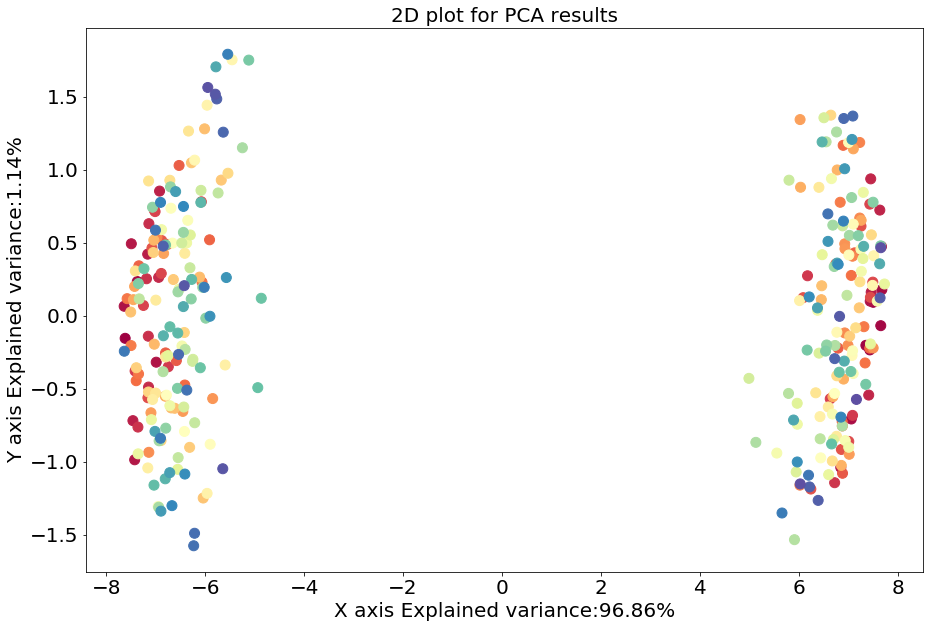

In [98]:
pca_embedding=PCA(n_components=2).fit_transform(cor_df)
# Fitting Model
x = np.linspace(1,10,319)
plt.figure(figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1],c=x, cmap='Spectral',s=100)
plt.xlabel('X axis Explained variance:96.86%',fontsize=20)
plt.ylabel('Y axis Explained variance:1.14%',fontsize=20)
plt.title("2D plot for PCA results",fontsize=20)

Text(0.5, 1.0, '1D plot for PCA results')

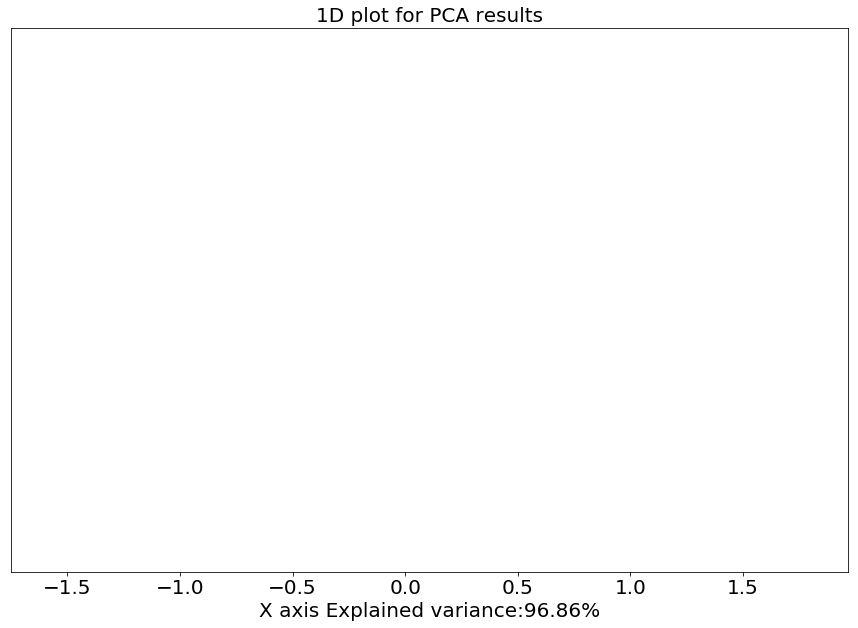

In [99]:
x = np.linspace(-10,10,319)
y1 =np.linspace(-1.5,1.5,50)
y2 =np.linspace(-1.5,1.5,50)
plt.figure(figsize=(15,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
axes=plt.subplot(111)
#plt.ylim(-8,8)
#plt.xlim(-1.5,1.5)
y=[0]*319
#plt.scatter(x,y,c=x, cmap='Spectral',s=100)
#plt.scatter(x,y2,c=x, cmap='Spectral',s=100)
plt.scatter(pca_embedding[:, 1],pca_embedding[:, 0] ,c='w',s=100)
#plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1],c=x, cmap='Spectral',s=100)
plt.xlabel('X axis Explained variance:96.86%',fontsize=20)
#plt.ylabel('Explained_variance_ratio:1.14%',fontsize=20)
axes.set_yticks([])
plt.title("1D plot for PCA results",fontsize=20)

In [47]:
pca_embedding_3=PCA(n_components=3).fit_transform(cor_df)

In [51]:
pca=PCA(n_components=3).fit(cor_df)
pca.explained_variance_ratio_

array([0.96855887, 0.01143524, 0.0064557 ])

In [48]:
from mpl_toolkits import mplot3d

Text(0.5, 0.92, ' 3D plot for PCA results')

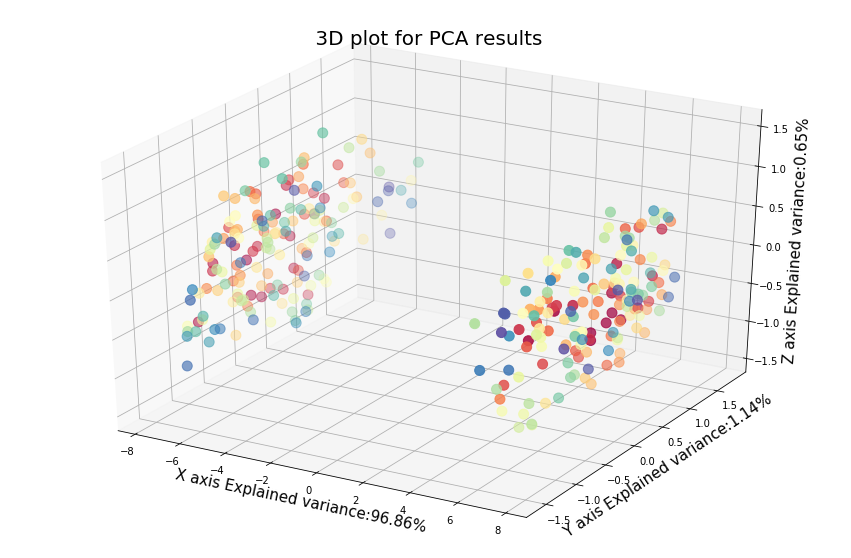

In [100]:
fig=plt.figure(figsize=(15,10))
ax=plt.axes(projection='3d')
ax.scatter(pca_embedding_3[:, 0], pca_embedding_3[:, 1],pca_embedding_3[:, 2],c=x, cmap='Spectral',s=100)
plt.xlabel('X axis Explained variance:96.86%',fontsize=15)
plt.ylabel('Y axis Explained variance:1.14%',fontsize=15)
#plt.zlabel('Explained_variance_ratio:0.65%',fontsize=20)
ax.set_zlabel('Z axis Explained variance:0.65%',fontsize=15)
plt.title(" 3D plot for PCA results",fontsize=20)

In [11]:
pca4=PCA(n_components=4).fit(cor_df)

In [12]:
pca4.explained_variance_ratio_

array([0.96855887, 0.01143524, 0.0064557 , 0.00590738])

In [59]:
pca1=PCA(n_components=1).fit(cor_df)
pca1.explained_variance_ratio_

array([0.96855887])

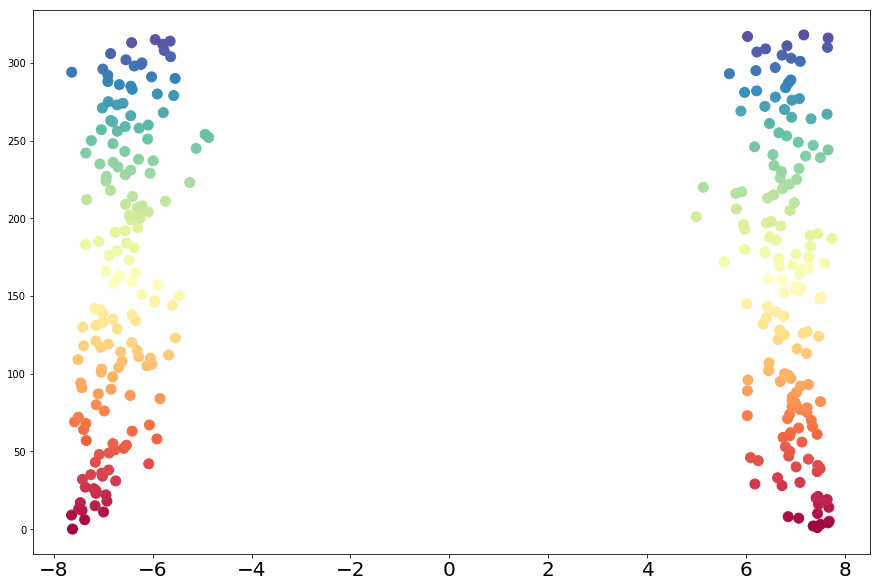

In [70]:
pca_embedding1=PCA(n_components=1).fit_transform(cor_df)
# Fitting Model
x = np.linspace(1,10,319)
plt.figure(figsize=(15,10))
plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
y=[x for x in range(0,319)]
plt.scatter(pca_embedding[:, 0],y,c=x, cmap='Spectral',s=100)

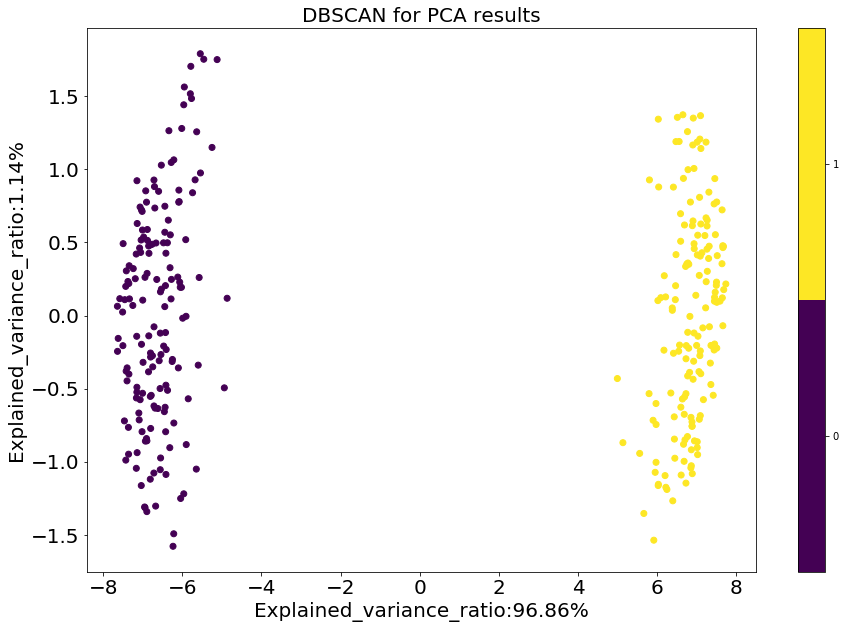

In [13]:
y_pred_pca = DBSCAN(eps = 0.8,min_samples=10).fit_predict(pca_embedding)
plt.figure(figsize=(15,10))
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=y_pred_pca)

cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
labels=[0,1,2,3]
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Explained_variance_ratio:96.86%',fontsize=20)
plt.ylabel('Explained_variance_ratio:1.14%',fontsize=20)
plt.title("DBSCAN for PCA results",fontsize=20)

plt.show()

In [14]:
y_pred_pca

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [15]:
sum(y_pred_pca)

157

In [16]:
new_dic_pca=getNewDic(trans_name_list,y_pred_pca)
#print(new_dic_tsne)
dic_pca_class0=getClass(new_dic_pca,0)
dic_pca_class1=getClass(new_dic_pca,1)

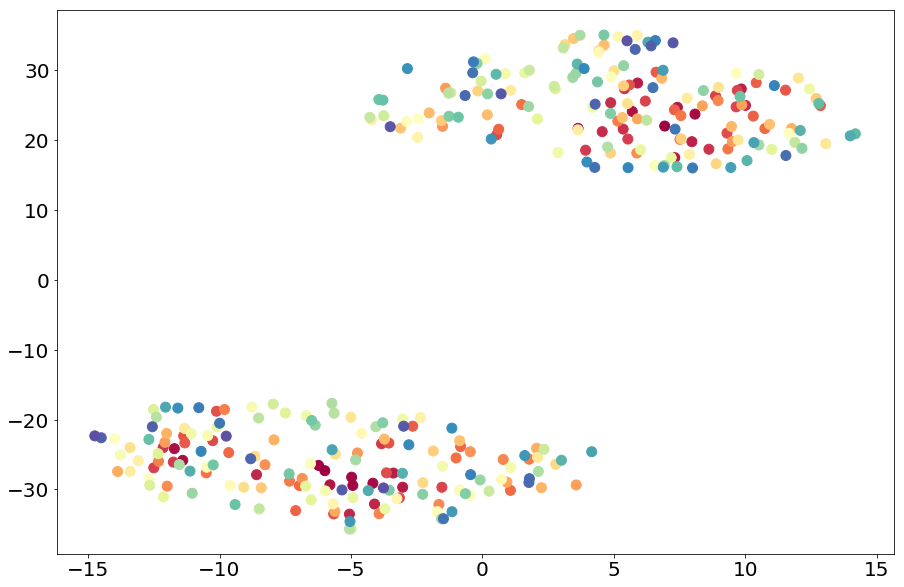

In [17]:
rng = np.random.RandomState(0)
# Defining Model
model = TSNE(random_state=42)

# Fitting Model
transformed = model.fit_transform(cor_df)

# Plotting 2d t-Sne
plt.figure(figsize=(15,10))
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
x = np.linspace(1,10,319)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(x_axis, y_axis, c=x,cmap='Spectral',s=100)
plt.show()

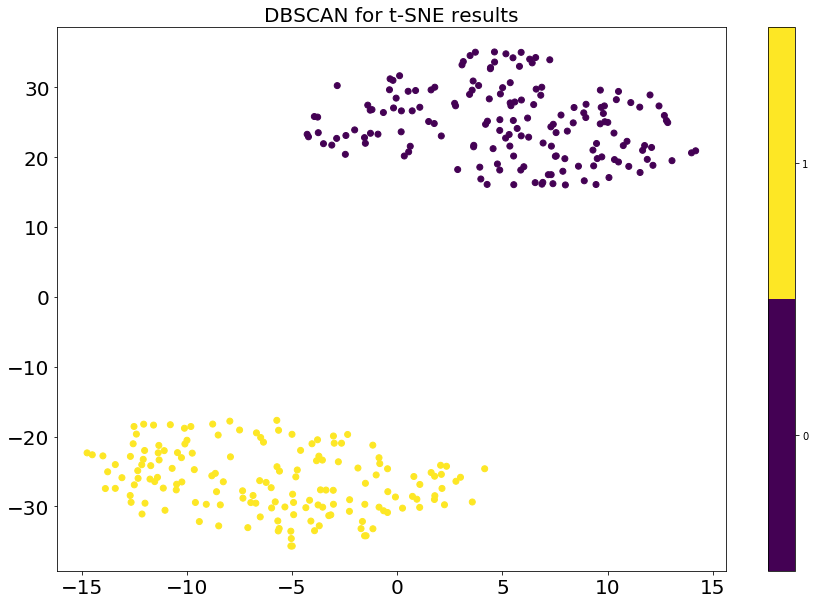

In [18]:
y_pred_tsne = DBSCAN(eps = 4,min_samples=10).fit_predict(transformed)
plt.figure(figsize=(15,10))
plt.scatter(x_axis, y_axis, c=y_pred_tsne)
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
labels=[0,1,2,3]
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("DBSCAN for t-SNE results",fontsize=20)
plt.show()

In [19]:
y_pred_tsne

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [20]:
new_dic_tsne=getNewDic(trans_name_list,y_pred_tsne)
#print(new_dic_tsne)
dic_tsne_class0=getClass(new_dic_tsne,0)
dic_tsne_class1=getClass(new_dic_tsne,1)

In [21]:
import umap
import warnings, tqdm
warnings.simplefilter('ignore')

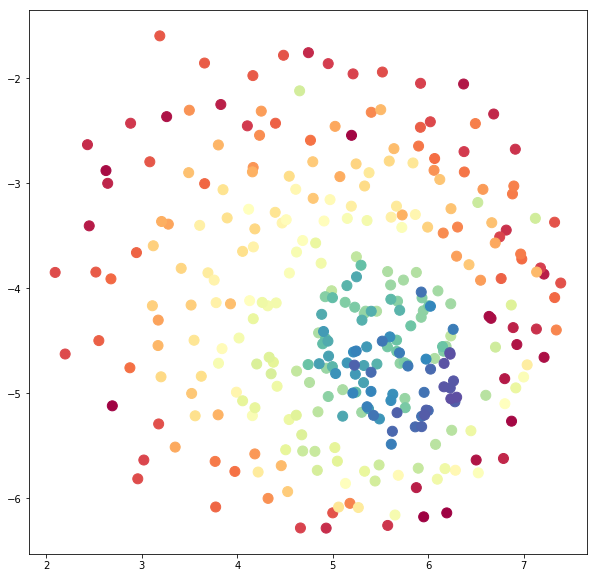

In [22]:
standard_embedding_jac = umap.UMAP(random_state=42,n_neighbors=10,metric='jaccard').fit_transform(cor_df)
x = np.linspace(1,10,319)
plt.figure(figsize=(10,10))
plt.scatter(standard_embedding_jac[:, 0], standard_embedding_jac[:, 1],c=x, cmap='Spectral',s=100)

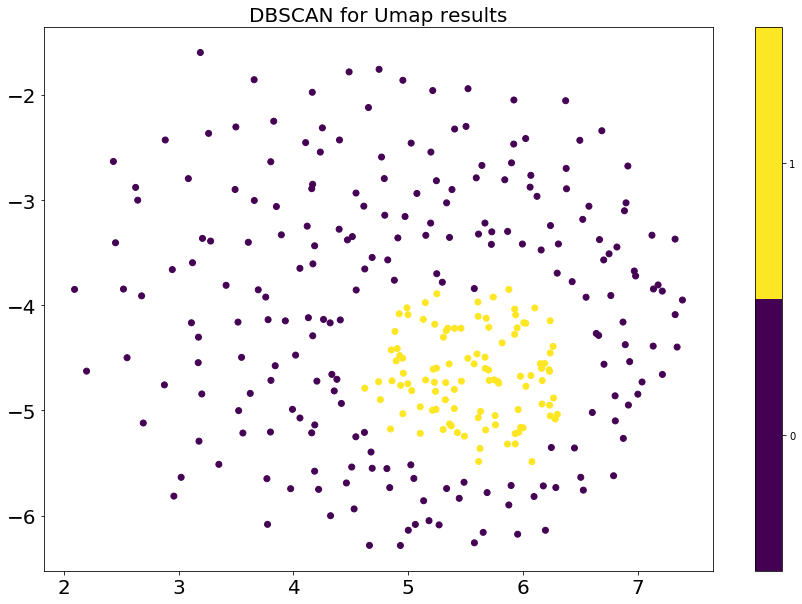

In [23]:
y_cor_umap = DBSCAN(eps = 0.3,min_samples=10).fit_predict(standard_embedding_jac)
plt.figure(figsize=(15,10))
plt.scatter(standard_embedding_jac[:, 0], standard_embedding_jac[:, 1], c=y_cor_umap+1)
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
labels=[0,1,2,3]
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(labels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("DBSCAN for Umap results",fontsize=20)
plt.show()

In [24]:
new_dic_umap=getNewDic(trans_name_list,y_cor_umap)
dic_umap_class0=getClass(new_dic_umap,0)
dic_umap_class1=getClass(new_dic_umap,1)

## Compare the jaccord similarity of cluster 0 in PCA to all class in Umap

In [25]:
pca0_to_umap0_jac=jaccard_similarity(dic_pca_class0,dic_umap_class0)
pca0_to_umap0_jac

['EMBV3_04070', 'EMBV3_01236', 'EMBV3_10391', 'EMBV3_10182', 'EMBV3_26574', 'EMBV3_40785', 'EMBV3_08367', 'EMBV3_40333', 'EMBV3_31178', 'EMBV3_37551', 'EMBV3_27532', 'EMBV3_33832', 'EMBV3_35497', 'EMBV3_10035', 'EMBV3_27206', 'EMBV3_20665', 'EMBV3_36296', 'EMBV3_02482', 'EMBV3_36106', 'EMBV3_29960', 'EMBV3_07809', 'EMBV3_26914', 'EMBV3_10009', 'EMBV3_38569', 'EMBV3_22321', 'EMBV3_08315', 'EMBV3_09731', 'EMBV3_04514', 'EMBV3_23730', 'EMBV3_30395', 'EMBV3_31754', 'EMBV3_00623', 'EMBV3_00580', 'EMBV3_36312', 'EMBV3_19426', 'EMBV3_35167', 'EMBV3_26939', 'EMBV3_02297', 'EMBV3_18675', 'EMBV3_33974', 'EMBV3_39520', 'EMBV3_01808', 'EMBV3_37626', 'EMBV3_21639', 'EMBV3_27982', 'EMBV3_01383', 'EMBV3_04106', 'EMBV3_21807', 'EMBV3_33015', 'EMBV3_22132', 'EMBV3_02698', 'EMBV3_39558', 'EMBV3_15661', 'EMBV3_02990', 'EMBV3_13723', 'EMBV3_21413', 'EMBV3_30297', 'EMBV3_37588', 'EMBV3_02854']
59


0.28365384615384615

In [26]:
pca0_to_umap1_jac=jaccard_similarity(dic_pca_class0,dic_umap_class1)
pca0_to_umap1_jac

[]
0


0.0

## Compare the jaccord similarity of cluster 1 in PCA to all class in Umap

In [27]:
pca1_to_umap0_jac=jaccard_similarity(dic_pca_class1,dic_umap_class0)
pca1_to_umap0_jac

['EMBV3_23433', 'EMBV3_18525', 'EMBV3_36658', 'EMBV3_01963', 'EMBV3_18804', 'EMBV3_27184', 'EMBV3_14991', 'EMBV3_20746', 'EMBV3_03231', 'EMBV3_00638', 'EMBV3_38036', 'EMBV3_16443', 'EMBV3_02920', 'EMBV3_42458', 'EMBV3_29756', 'EMBV3_41725', 'EMBV3_33527', 'EMBV3_31515', 'EMBV3_10480', 'EMBV3_39618', 'EMBV3_11126', 'EMBV3_18319', 'EMBV3_10091', 'EMBV3_05327', 'EMBV3_16929', 'EMBV3_43676', 'EMBV3_22554', 'EMBV3_32250', 'EMBV3_09247', 'EMBV3_09391', 'EMBV3_34178', 'EMBV3_29901', 'EMBV3_35502', 'EMBV3_40713', 'EMBV3_18059', 'EMBV3_40194', 'EMBV3_33952', 'EMBV3_28192', 'EMBV3_18349', 'EMBV3_01746', 'EMBV3_40933', 'EMBV3_34629', 'EMBV3_03741', 'EMBV3_08059', 'EMBV3_26710', 'EMBV3_19476']
46


0.21296296296296297

In [28]:
pca1_to_umap1_jac=jaccard_similarity(dic_pca_class1,dic_umap_class1)
pca1_to_umap1_jac

[]
0


0.0

## Compare the jaccord similarity of cluster 0 in PCA to all class in t-SNE

In [29]:
pca0_to_tsne0_jac=jaccard_similarity(dic_pca_class0,dic_tsne_class0)
pca0_to_tsne0_jac

['EMBV3_04070', 'EMBV3_25303', 'EMBV3_19353', 'EMBV3_10182', 'EMBV3_40785', 'EMBV3_25826', 'EMBV3_38302', 'EMBV3_13848', 'EMBV3_06333', 'EMBV3_35497', 'EMBV3_25783', 'EMBV3_01879', 'EMBV3_10214', 'EMBV3_07809', 'EMBV3_39314', 'EMBV3_11774', 'EMBV3_22321', 'EMBV3_34041', 'EMBV3_00623', 'EMBV3_19426', 'EMBV3_21150', 'EMBV3_16793', 'EMBV3_38154', 'EMBV3_39552', 'EMBV3_29667', 'EMBV3_03794', 'EMBV3_31308', 'EMBV3_35342', 'EMBV3_21413', 'EMBV3_02854', 'EMBV3_03757', 'EMBV3_01531', 'EMBV3_33638', 'EMBV3_10391', 'EMBV3_26574', 'EMBV3_33432', 'EMBV3_11501', 'EMBV3_42829', 'EMBV3_02731', 'EMBV3_26125', 'EMBV3_29666', 'EMBV3_37588', 'EMBV3_27206', 'EMBV3_20665', 'EMBV3_04815', 'EMBV3_02482', 'EMBV3_28651', 'EMBV3_09881', 'EMBV3_09731', 'EMBV3_16120', 'EMBV3_12962', 'EMBV3_30395', 'EMBV3_14778', 'EMBV3_00580', 'EMBV3_36312', 'EMBV3_12465', 'EMBV3_19554', 'EMBV3_11519', 'EMBV3_43227', 'EMBV3_35167', 'EMBV3_00706', 'EMBV3_12627', 'EMBV3_20739', 'EMBV3_20092', 'EMBV3_39520', 'EMBV3_02297', 'EMBV3_27

1.0

In [30]:
pca0_to_tsne1_jac=jaccard_similarity(dic_pca_class0,dic_tsne_class1)
pca0_to_tsne1_jac

[]
0


0.0

## Compare the jaccord similarity of cluster 1 in PCA to all class in t-SNE

In [31]:
pca1_to_tsne0_jac=jaccard_similarity(dic_pca_class1,dic_tsne_class0)
pca1_to_tsne0_jac

[]
0


0.0

In [32]:
pca1_to_tsne1_jac=jaccard_similarity(dic_pca_class1,dic_tsne_class1)
pca1_to_tsne1_jac

['EMBV3_23433', 'EMBV3_18525', 'EMBV3_07405', 'EMBV3_12959', 'EMBV3_14555', 'EMBV3_14991', 'EMBV3_33836', 'EMBV3_12355', 'EMBV3_15815', 'EMBV3_12238', 'EMBV3_12193', 'EMBV3_10019', 'EMBV3_30249', 'EMBV3_26115', 'EMBV3_16443', 'EMBV3_37185', 'EMBV3_08727', 'EMBV3_31260', 'EMBV3_39217', 'EMBV3_18319', 'EMBV3_20599', 'EMBV3_33668', 'EMBV3_16929', 'EMBV3_28438', 'EMBV3_13357', 'EMBV3_09247', 'EMBV3_22538', 'EMBV3_10996', 'EMBV3_00730', 'EMBV3_10667', 'EMBV3_39442', 'EMBV3_43023', 'EMBV3_35502', 'EMBV3_29901', 'EMBV3_38592', 'EMBV3_35222', 'EMBV3_30869', 'EMBV3_27211', 'EMBV3_37260', 'EMBV3_17499', 'EMBV3_22640', 'EMBV3_24621', 'EMBV3_08059', 'EMBV3_12232', 'EMBV3_18274', 'EMBV3_20772', 'EMBV3_29318', 'EMBV3_32407', 'EMBV3_27184', 'EMBV3_16014', 'EMBV3_00638', 'EMBV3_25091', 'EMBV3_12200', 'EMBV3_02920', 'EMBV3_16476', 'EMBV3_42458', 'EMBV3_29756', 'EMBV3_18341', 'EMBV3_41725', 'EMBV3_08281', 'EMBV3_33523', 'EMBV3_31515', 'EMBV3_39618', 'EMBV3_10091', 'EMBV3_27070', 'EMBV3_09715', 'EMBV3_21

1.0

## Compare the jaccord similarity of cluster 1 in t-SNE to all class in UMAP

In [33]:
tsne0_to_umap0_jac=jaccard_similarity(dic_tsne_class0,dic_umap_class0)
tsne0_to_umap0_jac

['EMBV3_04070', 'EMBV3_01236', 'EMBV3_10391', 'EMBV3_10182', 'EMBV3_26574', 'EMBV3_40785', 'EMBV3_08367', 'EMBV3_40333', 'EMBV3_31178', 'EMBV3_37551', 'EMBV3_27532', 'EMBV3_33832', 'EMBV3_35497', 'EMBV3_10035', 'EMBV3_27206', 'EMBV3_20665', 'EMBV3_36296', 'EMBV3_02482', 'EMBV3_36106', 'EMBV3_29960', 'EMBV3_07809', 'EMBV3_26914', 'EMBV3_10009', 'EMBV3_38569', 'EMBV3_22321', 'EMBV3_08315', 'EMBV3_09731', 'EMBV3_04514', 'EMBV3_23730', 'EMBV3_30395', 'EMBV3_31754', 'EMBV3_00623', 'EMBV3_00580', 'EMBV3_36312', 'EMBV3_19426', 'EMBV3_35167', 'EMBV3_26939', 'EMBV3_02297', 'EMBV3_18675', 'EMBV3_33974', 'EMBV3_39520', 'EMBV3_01808', 'EMBV3_37626', 'EMBV3_21639', 'EMBV3_27982', 'EMBV3_01383', 'EMBV3_04106', 'EMBV3_21807', 'EMBV3_33015', 'EMBV3_22132', 'EMBV3_02698', 'EMBV3_39558', 'EMBV3_15661', 'EMBV3_02990', 'EMBV3_13723', 'EMBV3_21413', 'EMBV3_30297', 'EMBV3_37588', 'EMBV3_02854']
59


0.28365384615384615

In [34]:
tsne0_to_umap1_jac=jaccard_similarity(dic_tsne_class0,dic_umap_class1)
tsne0_to_umap1_jac

[]
0


0.0

## Compare the jaccord similarity of cluster 1 in PCA to all class in t-SNE

In [35]:
tsne1_to_umap0_jac=jaccard_similarity(dic_tsne_class1,dic_umap_class0)
tsne1_to_umap0_jac

['EMBV3_23433', 'EMBV3_18525', 'EMBV3_36658', 'EMBV3_01963', 'EMBV3_18804', 'EMBV3_27184', 'EMBV3_14991', 'EMBV3_20746', 'EMBV3_03231', 'EMBV3_00638', 'EMBV3_38036', 'EMBV3_16443', 'EMBV3_02920', 'EMBV3_42458', 'EMBV3_29756', 'EMBV3_41725', 'EMBV3_33527', 'EMBV3_31515', 'EMBV3_10480', 'EMBV3_39618', 'EMBV3_11126', 'EMBV3_18319', 'EMBV3_10091', 'EMBV3_05327', 'EMBV3_16929', 'EMBV3_43676', 'EMBV3_22554', 'EMBV3_32250', 'EMBV3_09247', 'EMBV3_09391', 'EMBV3_34178', 'EMBV3_29901', 'EMBV3_35502', 'EMBV3_40713', 'EMBV3_18059', 'EMBV3_40194', 'EMBV3_33952', 'EMBV3_28192', 'EMBV3_18349', 'EMBV3_01746', 'EMBV3_40933', 'EMBV3_34629', 'EMBV3_03741', 'EMBV3_08059', 'EMBV3_26710', 'EMBV3_19476']
46


0.21296296296296297

In [36]:
tsne1_to_umap1_jac=jaccard_similarity(dic_tsne_class1,dic_umap_class1)
tsne1_to_umap1_jac

[]
0


0.0

In [37]:
qanalysis_cluster=pd.read_csv("BMA network clusters.csv")
qanalysis_cluster

,Gene Name,Cluster
0,EMBV3_12193,1
1,EMBV3_11449,1
2,EMBV3_19147,1
3,EMBV3_38592,1
4,EMBV3_12232,1
5,EMBV3_29901,1
6,EMBV3_20772,1
7,EMBV3_34178,1
8,EMBV3_00730,1
9,EMBV3_02920,1


In [38]:
qanalysis_cluster['Cluster']=qanalysis_cluster['Cluster']-1

In [39]:
qanalysis_cluster_0=list(qanalysis_cluster[qanalysis_cluster['Cluster']==0]['Gene Name'])

In [40]:
qanalysis_cluster_0

['EMBV3_12193',
 'EMBV3_11449',
 'EMBV3_19147',
 'EMBV3_38592',
 'EMBV3_12232',
 'EMBV3_29901',
 'EMBV3_20772',
 'EMBV3_34178',
 'EMBV3_00730',
 'EMBV3_02920',
 'EMBV3_40194',
 'EMBV3_33550',
 'EMBV3_11544',
 'EMBV3_33523',
 'EMBV3_09789',
 'EMBV3_33952',
 'EMBV3_40933',
 'EMBV3_40713',
 'EMBV3_37898',
 'EMBV3_18274',
 'EMBV3_29621',
 'EMBV3_07405',
 'EMBV3_29318',
 'EMBV3_26465',
 'EMBV3_29586',
 'EMBV3_18349',
 'EMBV3_43023',
 'EMBV3_13137',
 'EMBV3_17886',
 'EMBV3_09860',
 'EMBV3_11724',
 'EMBV3_24621',
 'EMBV3_43215',
 'EMBV3_18059',
 'EMBV3_27070',
 'EMBV3_04354',
 'EMBV3_07752',
 'EMBV3_16443',
 'EMBV3_16014',
 'EMBV3_18097',
 'EMBV3_06553',
 'EMBV3_13357',
 'EMBV3_02040',
 'EMBV3_37260',
 'EMBV3_10019',
 'EMBV3_19476',
 'EMBV3_11126',
 'EMBV3_09247',
 'EMBV3_32250',
 'EMBV3_14527',
 'EMBV3_07113',
 'EMBV3_12200',
 'EMBV3_35502',
 'EMBV3_08378',
 'EMBV3_09095',
 'EMBV3_14555',
 'EMBV3_00638',
 'EMBV3_20746',
 'EMBV3_15281',
 'EMBV3_26826',
 'EMBV3_11034',
 'EMBV3_22554',
 'EMBV3_

In [41]:
len(qanalysis_cluster_0)

75

In [42]:
qanalysis_cluster_1=list(qanalysis_cluster[qanalysis_cluster['Cluster']==1]['Gene Name'])

## Compare the jaccord similarity of PCA cluster 0 to all class in Q-analysis

In [43]:
pca0_to_qanalysis0_jac=jaccard_similarity(dic_pca_class0,qanalysis_cluster_0)
pca0_to_qanalysis0_jac

[]
0


0.0

In [44]:
pca0_to_qanalysis1_jac=jaccard_similarity(dic_pca_class0,qanalysis_cluster_1)
pca0_to_qanalysis1_jac

['EMBV3_01531', 'EMBV3_01236', 'EMBV3_17007', 'EMBV3_25303', 'EMBV3_26574', 'EMBV3_17583', 'EMBV3_36880', 'EMBV3_18935', 'EMBV3_40333', 'EMBV3_31178', 'EMBV3_30293', 'EMBV3_33890', 'EMBV3_37312', 'EMBV3_11404', 'EMBV3_13848', 'EMBV3_26125', 'EMBV3_29779', 'EMBV3_23136', 'EMBV3_10035', 'EMBV3_01879', 'EMBV3_32008', 'EMBV3_10214', 'EMBV3_02482', 'EMBV3_22139', 'EMBV3_39314', 'EMBV3_10009', 'EMBV3_23352', 'EMBV3_22321', 'EMBV3_15000', 'EMBV3_08315', 'EMBV3_16120', 'EMBV3_35158', 'EMBV3_38171', 'EMBV3_34041', 'EMBV3_14778', 'EMBV3_19426', 'EMBV3_36312', 'EMBV3_12465', 'EMBV3_35167', 'EMBV3_43227', 'EMBV3_37424', 'EMBV3_12627', 'EMBV3_39520', 'EMBV3_38154', 'EMBV3_39552', 'EMBV3_01808', 'EMBV3_08592', 'EMBV3_29667', 'EMBV3_17716', 'EMBV3_32249', 'EMBV3_31308', 'EMBV3_21639', 'EMBV3_35013', 'EMBV3_01383', 'EMBV3_20737', 'EMBV3_21807', 'EMBV3_00387', 'EMBV3_22132', 'EMBV3_18929', 'EMBV3_27982', 'EMBV3_35342', 'EMBV3_02698', 'EMBV3_15296', 'EMBV3_15661', 'EMBV3_38340', 'EMBV3_13723', 'EMBV3_31

0.41975308641975306

In [45]:
#len(qanalysis_cluster_1)/len(pca0_to_qanalysis1_jac)

TypeError: object of type 'float' has no len()

## Compare the jaccord similarity of PCA cluster 1 to all class in Q-analysis

In [46]:
pca1_to_qanalysis0_jac=jaccard_similarity(dic_pca_class1,qanalysis_cluster_0)
pca1_to_qanalysis0_jac

['EMBV3_12232', 'EMBV3_29621', 'EMBV3_03045', 'EMBV3_18274', 'EMBV3_07405', 'EMBV3_20772', 'EMBV3_40717', 'EMBV3_29318', 'EMBV3_12959', 'EMBV3_14555', 'EMBV3_43215', 'EMBV3_16014', 'EMBV3_20746', 'EMBV3_11449', 'EMBV3_15281', 'EMBV3_02040', 'EMBV3_09860', 'EMBV3_09789', 'EMBV3_00638', 'EMBV3_12193', 'EMBV3_10019', 'EMBV3_30249', 'EMBV3_37898', 'EMBV3_16443', 'EMBV3_06553', 'EMBV3_02920', 'EMBV3_12200', 'EMBV3_09095', 'EMBV3_22731', 'EMBV3_09323', 'EMBV3_18341', 'EMBV3_33523', 'EMBV3_35502', 'EMBV3_11126', 'EMBV3_07752', 'EMBV3_27070', 'EMBV3_20599', 'EMBV3_17886', 'EMBV3_08378', 'EMBV3_33550', 'EMBV3_21795', 'EMBV3_11034', 'EMBV3_01993', 'EMBV3_22554', 'EMBV3_43676', 'EMBV3_13357', 'EMBV3_26826', 'EMBV3_32250', 'EMBV3_19147', 'EMBV3_09247', 'EMBV3_31335', 'EMBV3_00730', 'EMBV3_34178', 'EMBV3_18097', 'EMBV3_07113', 'EMBV3_40713', 'EMBV3_29901', 'EMBV3_43023', 'EMBV3_13137', 'EMBV3_38592', 'EMBV3_11724', 'EMBV3_40194', 'EMBV3_33952', 'EMBV3_29586', 'EMBV3_18059', 'EMBV3_26465', 'EMBV3_18

0.47770700636942676

In [ ]:
pca1_to_qanalysis1_jac=jaccard_similarity(dic_pca_class1,qanalysis_cluster_1)
pca1_to_qanalysis1_jac

## Compare the jaccord similarity of UMAP cluster 0 to all class in Q-analysis

In [ ]:
umap0_to_qanalysis0_jac=jaccard_similarity(dic_umap_class0,qanalysis_cluster_0)
umap0_to_qanalysis0_jac

In [ ]:
umap0_to_qanalysis1_jac=jaccard_similarity(dic_umap_class0,qanalysis_cluster_1)
umap0_to_qanalysis1_jac

In [ ]:
umap1_to_qanalysis0_jac=jaccard_similarity(dic_umap_class1,qanalysis_cluster_0)
umap1_to_qanalysis0_jac

In [ ]:
umap1_to_qanalysis1_jac=jaccard_similarity(dic_umap_class1,qanalysis_cluster_1)
umap1_to_qanalysis1_jac

In [ ]:
cor_df

In [ ]:
tran_names_list=list(df.index)
tran_names_list[:5]

In [ ]:
Ajacency=np.matrix(df)
Ajacency

In [ ]:
G = nx.from_numpy_matrix(Ajacency, create_using=nx.MultiGraph)

### Rename the node name for graph

In [ ]:
mapping=dict(zip(G,tran_names_list))
G = nx.relabel_nodes(G, mapping)

### Build up a incidence matrix

In [ ]:
inci_matrix=nx.linalg.graphmatrix.incidence_matrix(G)
inci=inci_matrix.toarray()

In [ ]:
inci.shape

### The second column of incidence matrix

In [ ]:
inci[:,1]

In [ ]:
weight=nx.get_edge_attributes(G,'weight')
pos=nx.get_node_attributes(G,'pos')

In [ ]:
#plt.figure(figsize=(10,10))
G2=nx.from_numpy_matrix(Ajacency,create_using=nx.MultiGraph)
nx.draw_circular(G2)
plt.axis('equal')

In [ ]:
print(nx.info(G2))

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


fig, ax = plt.subplots(figsize=(50,20))
plt.bar(deg, cnt, width=1.5, color='b')

plt.title("Degree Histogram",fontsize=50)
plt.ylabel("Frequence",fontsize=50)
plt.xlabel("Degree",fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.set_xticks([d  for d in deg])
ax.set_xticklabels(deg,fontsize=30)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

for a,b in zip(deg,cnt):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=30)
# draw graph in inset
'''
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=30)
nx.draw_networkx_edges(G, pos, alpha=0.5)
'''
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(50,20))
#Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.savefig('networks.png', dpi = 90)

In [ ]:
items=dict(G.degree()).items()
L = sorted(items,key=lambda item:item[1],reverse=True)

In [ ]:
for i in L:
    if i[1]==162:
        print(i[0])

In [ ]:
L 

In [ ]:
cnt

In [ ]:
deg